In [10]:
import pandas as pd

# Load only the first 20,000 rows to avoid memory errors
# This is enough to start our EDA and testing
df = pd.read_csv('../data/raw/complaints.csv', nrows=100000)

# Let's check if it worked
print(f"Success! Loaded {len(df)} rows.")
print("The columns in this file are:")
print(df.columns.tolist())

Success! Loaded 100000 rows.
The columns in this file are:
['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [11]:
# Define the five product categories mentioned in your project brief
# These are the categories Asha and the team care about [cite: 38, 39, 40, 41]
target_products = [
    'Credit card or prepaid card',
    'Personal loan',
    'Checking or savings account',
    'Money transfer, virtual currency, or money service',
    'Payday loan, title loan, or personal loan' # This often covers Personal Loans in CFPB data
]

# 1. Keep only the products we need [cite: 139]
df_filtered = df[df['Product'].isin(target_products)].copy()

# 2. Remove rows where the 'Consumer complaint narrative' is empty [cite: 140]
# This is crucial because our RAG model needs text to answer questions!
df_filtered = df_filtered.dropna(subset=['Consumer complaint narrative'])

# Let's see how many rows we have left for our analysis
print(f"Rows remaining after filtering: {len(df_filtered)}")
print(df_filtered['Product'].value_counts())

Rows remaining after filtering: 205
Product
Checking or savings account                           166
Money transfer, virtual currency, or money service     39
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_10108\2570053516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, y='Product', palette='viridis', order=df_filtered['Product'].value_counts().index)


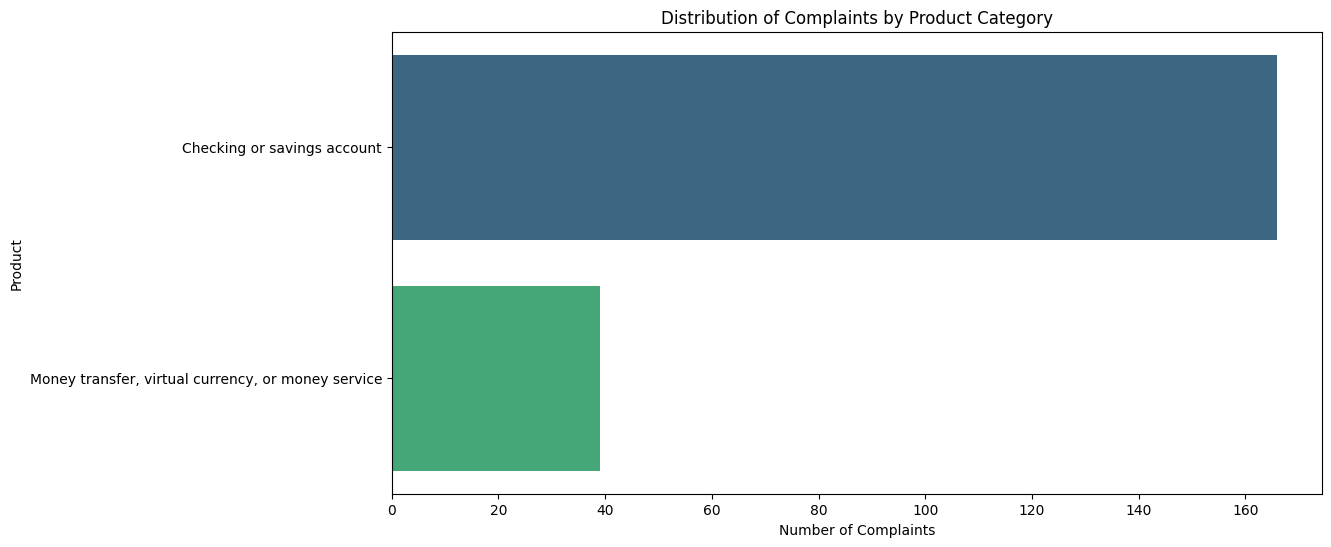

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, y='Product', palette='viridis', order=df_filtered['Product'].value_counts().index)
plt.title('Distribution of Complaints by Product Category')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()

In [13]:
import re

def clean_complaint(text):
    # 1. Lowercase everything [cite: 144]
    text = text.lower()
    # 2. Remove symbols and numbers [cite: 145]
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Remove extra spaces
    text = " ".join(text.split())
    return text

# Apply the cleaning function
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_complaint)

# Check the results
print("Original:", df_filtered['Consumer complaint narrative'].iloc[0][:100])
print("Cleaned :", df_filtered['cleaned_narrative'].iloc[0][:100])

Original: I made the mistake of using my wellsfargo debit card to depsit funds Into XXXXXXXX ATM machine outsi
Cleaned : i made the mistake of using my wellsfargo debit card to depsit funds into xxxxxxxx atm machine outsi


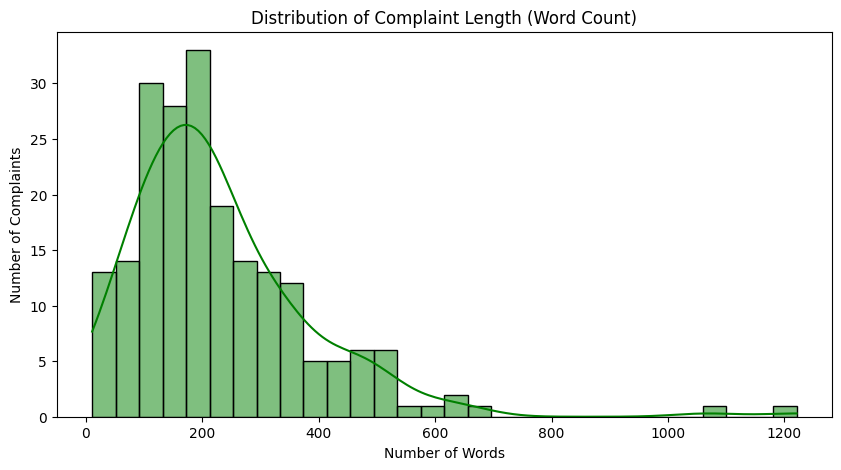

Average complaint length: 231.8 words


In [14]:
# Count words in each cleaned narrative 
df_filtered['word_count'] = df_filtered['cleaned_narrative'].apply(lambda x: len(x.split()))

# Visualize the distribution 
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Complaint Length (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Complaints')
plt.show()

print(f"Average complaint length: {df_filtered['word_count'].mean():.1f} words")

In [15]:
# Save to the processed folder
df_filtered.to_csv('../data/processed/filtered_complaints.csv', index=False)
print("File saved successfully to data/processed/!")

File saved successfully to data/processed/!
